In [ ]:
!pwd

/content


In [ ]:
!git clone https://github.com/leeyeehoo/CSRNet-pytorch.git

fatal: destination path 'CSRNet-pytorch' already exists and is not an empty directory.


In [ ]:
cd CSRNet-pytorch/

/content/CSRNet-pytorch


In [ ]:
!python3 utils.py

In [ ]:
ls

dataset.py          part_A_train.json           part_B_val.json
image.py            part_A_train_with_val.json  __pycache__/
make_dataset.ipynb  part_A_val.json             README.md
make_model.ipynb    part_B_test.json            train.py
model.py            part_B_train.json           utils.py
part_A_test.json    part_B_train_with_val.json  val.ipynb


In [ ]:
import torch.nn as nn
import torch
from torchvision import models
from utils import save_net,load_net

class CSRNet(nn.Module):
    def __init__(self, load_weights=False):
        super(CSRNet, self).__init__()
        self.seen = 0
        self.frontend_feat = [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512]
        self.backend_feat  = [512, 512, 512,256,128,64]
        self.frontend = make_layers(self.frontend_feat)
        self.backend = make_layers(self.backend_feat,in_channels = 512,dilation = True)
        self.output_layer = nn.Conv2d(64, 1, kernel_size=1)
        if not load_weights:
            mod = models.vgg16(pretrained = True)
            self._initialize_weights()
            for i in range(len(self.frontend.state_dict().items())):
                list(self.frontend.state_dict().items())[i][1].data[:] = list(mod.state_dict().items())[i][1].data[:]
    def forward(self,x):
        x = self.frontend(x)
        x = self.backend(x)
        x = self.output_layer(x)
        return x
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.normal_(m.weight, std=0.01)
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            
                
def make_layers(cfg, in_channels = 3,batch_norm=False,dilation = False):
    if dilation:
        d_rate = 2
    else:
        d_rate = 1
    layers = []
    for v in cfg:
        if v == 'M':
            layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
        else:
            conv2d = nn.Conv2d(in_channels, v, kernel_size=3, padding=d_rate,dilation = d_rate)
            if batch_norm:
                layers += [conv2d, nn.BatchNorm2d(v), nn.ReLU(inplace=True)]
            else:
                layers += [conv2d, nn.ReLU(inplace=True)]
            in_channels = v
    return nn.Sequential(*layers) 

In [ ]:
#importing libraries
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter
import scipy
import json
import torchvision.transforms.functional as F
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
%matplotlib inline

In [ ]:
from torchvision import datasets, transforms
transform=transforms.Compose([
                       transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225]),
                   ])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model = CSRNet()

In [ ]:
model = model.cuda()


In [ ]:
checkpoint = torch.load('/content/drive/My Drive/Crowd_counting_pytorch/0model_best.pth.tar')
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

Predicted Count :  384


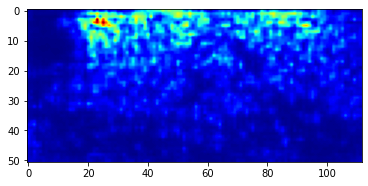

In [ ]:
from matplotlib import cm as c
img = transform(Image.open('/content/sample_data/IMG_100.jpg').convert('RGB')).cuda()

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()



Original Image


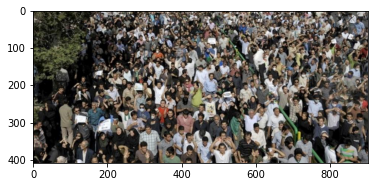

There are 371 people in this image


In [ ]:
print("Original Image")
plt.imshow(plt.imread('/content/sample_data/IMG_100.jpg'))
plt.show()
mat_file = io.loadmat('/content/sample_data/GT_IMG_100.mat')
value_1=mat_file['image_info']
m,n=value_1[0][0][0][0][0].shape
print('There are %d people in this image'%m)

Predicted Count :  33


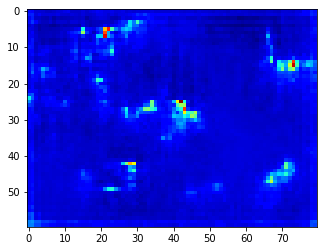

Original Image


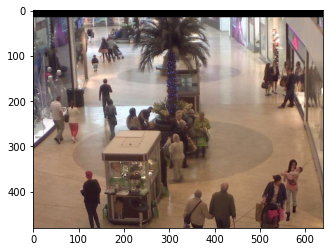

In [ ]:
from matplotlib import cm as c
img = transform(Image.open('/content/sample_data/seq_000002.jpg').convert('RGB')).cuda()

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
print("Original Image")
plt.imshow(plt.imread('/content/sample_data/seq_000002.jpg'))
plt.show()

Predicted Count :  31


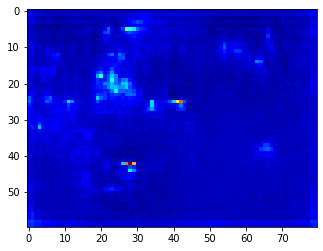

Original Image


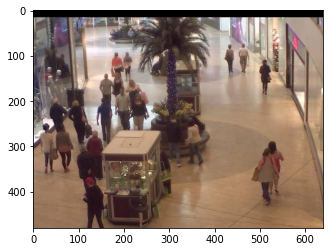

In [ ]:
from matplotlib import cm as c
img = transform(Image.open('/content/sample_data/seq_000359.jpg').convert('RGB')).cuda()

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
print("Original Image")
plt.imshow(plt.imread('/content/sample_data/seq_000359.jpg'))
plt.show()

Predicted Count :  1028


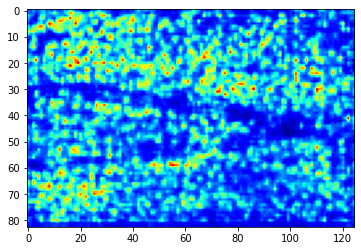

Original Image


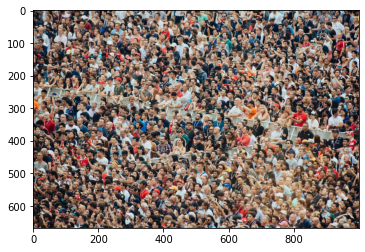

In [ ]:
from matplotlib import cm as c
img = transform(Image.open('/content/sample_data/Crowd_test1.jpg').convert('RGB')).cuda()

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
print("Original Image")
plt.imshow(plt.imread('/content/sample_data/Crowd_test1.jpg'))
plt.show()

Predicted Count :  267


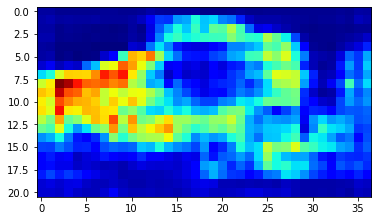

Original Image


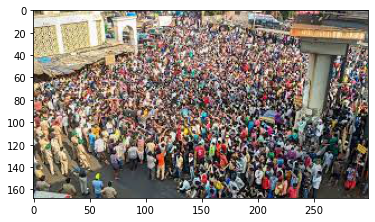

In [ ]:
from matplotlib import cm as c
img = transform(Image.open('/content/sample_data/Crowd_test2.jpg').convert('RGB')).cuda()

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
print("Original Image")
plt.imshow(plt.imread('/content/sample_data/Crowd_test2.jpg'))
plt.show()

Predicted Count :  261


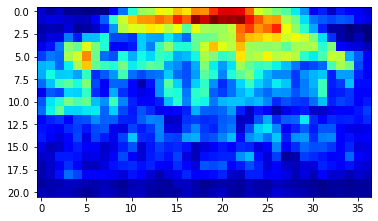

Original Image


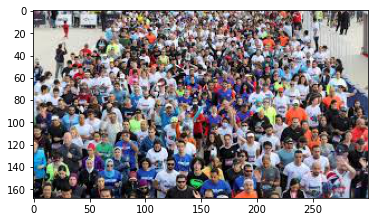

In [ ]:
from matplotlib import cm as c
img = transform(Image.open('/content/sample_data/Crowd_test3.jpg').convert('RGB')).cuda()

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
print("Original Image")
plt.imshow(plt.imread('/content/sample_data/Crowd_test3.jpg'))
plt.show()

Predicted Count :  5081


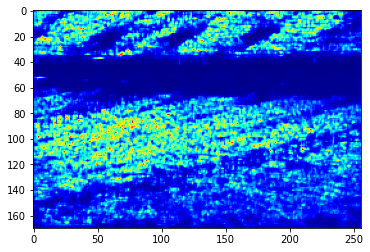

Original Image


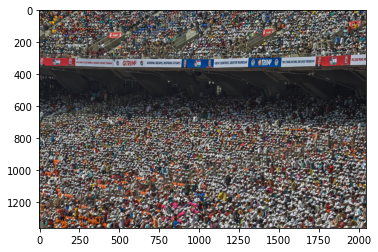

In [ ]:
from matplotlib import cm as c
img = transform(Image.open('/content/sample_data/Crowd_test4.jpg').convert('RGB')).cuda()

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
print("Original Image")
plt.imshow(plt.imread('/content/sample_data/Crowd_test4.jpg'))
plt.show()